# StellarGraph Full Dataset

This notebook is mostly used to load the full dataset provided, and test some StellarGraph algorithms. 

First, we load the necessary packages

In [1]:
import numpy as np
import scipy as sp
import pickle as pkl
import networkx as nx
from py2neo import Graph
import py2neo
import pandas as pd
import nxviz as nv
import matplotlib.pyplot as plt
from stellargraph import StellarGraph


%matplotlib inline

C:\Users\bruno\anaconda3\lib\site-packages\nxviz\__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.0 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.0, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In the next part, the different nodes are loaded with their corresponding edges

In [2]:
broker_nodes = pkl.load(open( "broker_nodes_brunosept.pkl", "rb" ))
cars_nodes = pkl.load(open( "cars_nodes_brunosept.pkl", "rb" ))
claims_nodes = pkl.load(open( "claims_nodes_brunosept.pkl", "rb" ))
policy_nodes = pkl.load(open( "policy_nodes_brunosept.pkl", "rb" ))
edges = pkl.load(open( "edges_brunosept.pkl", "rb" ))

labels = pd.DataFrame(pkl.load(open("Y", "rb")))

In [6]:
labels.rename(columns = {"y1": "Fraud", "y2":"Labelled"}, inplace = True)
labels.head()

,Fraud,Labelled
SI01_NO_SIN,,
000020211004303,0,0.0
000020211004304,0,0.0
000020211004306,0,0.0
000020211004307,0,0.0
000020211004308,0,0.0


And finally, we make our graph

In [9]:
HG = StellarGraph({"claim" : claims_nodes, "car" : cars_nodes, "policy" : policy_nodes, "broker" : broker_nodes}, edges)

In [13]:
degrees = HG.node_degrees()
claim_degrees = pd.Series([degrees[x] for x in list(claims_nodes.index)])
car_degrees = pd.Series([degrees[x] for x in list(cars_nodes.index)])
policy_degrees = pd.Series([degrees[x] for x in list(policy_nodes.index)])
broker_degrees = pd.Series([degrees[x] for x in list(broker_nodes.index)])
perc = [.25,.50,.75,.85,.95, .99] 

<AxesSubplot:>

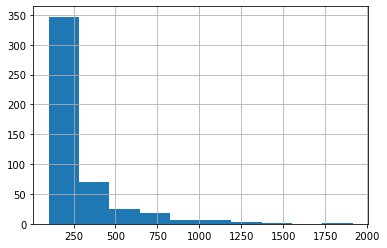

In [18]:
broker_degrees[broker_degrees>100].hist()

In [13]:
with open("C:/Users/bruno/OneDrive/Documenten/KUL/MaAct2/Thesis/Python/multigraph.dump", 'wb') as f:
    pkl.dump(HG, f)

In [19]:
HG_claims = HG.nodes("claim")
HG_cars = HG.nodes("car")

In [20]:
HG_sub = list(HG_claims)+ list(HG_cars)
print(HG_sub[1] == HG_claims[1],
HG_sub[-1] == HG_cars[-1])

True True


In [23]:
amat.sum(axis = 0)

matrix([[1060.,  289., 1915., ...,    2.,    2.,    2.]], dtype=float32)

In [27]:
A = adjmat_claim_car @ adjmat_car_policy @ adjmat_policy_broker
A.count_nonzero()

1167038

In [29]:
Proj = A @ A.transpose()
Proj.count_nonzero()

2314182951

In [ ]:
Proj.setdiag(0)

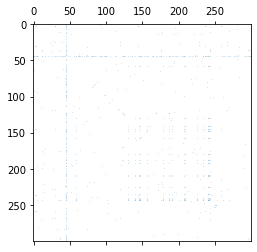

In [40]:
plt.spy(Proj[:300,:300], markersize = 0.05)
plt.savefig("First300AdjMat.pdf")

In [27]:
Proj_nx = nx.convert_matrix.from_scipy_sparse_matrix(Proj[:300,:300])
Proj_nx.remove_edges_from(nx.selfloop_edges(Proj_nx))

## Going to bipartite network with parties and claims

The problem with the first approach is that we cannot distinguish between claims that are closer and further apart. 

We cannot see if two nodes that connect after projection connected to the same car or if they can only reach eachother by going through a broker in the original network. 

This is a particular problem in our large network, where some brokers have a lot of connections, and act as some kind of hub. 

In [28]:
C = adjmat_claim_car
P = adjmat_car_policy
B = adjmat_policy_broker
CP = C @ P
CB = CP @ B

In [29]:
adjmat_bipartite = sp.sparse.hstack((C, CP, CB))

In [32]:
A_weighted = adjmat_bipartite @ adjmat_bipartite.transpose()

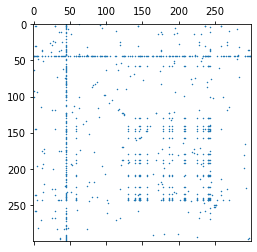

In [41]:
A_draw = A_weighted[:300,:300]
A_draw.setdiag(0)
plt.spy(A_draw, markersize = 0.5)

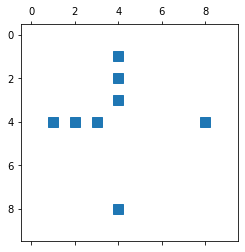

In [42]:
A_draw = A_weighted[40:50,40:50]
A_draw.setdiag(0)
plt.spy(A_draw)

In [47]:
j = 0
nodes = []
for i in HG.connected_components():
    nodes.append(len(i))
    j += 1
print(j)
print(nodes)

3908
[962620, 283, 220, 205, 184, 183, 182, 181, 178, 177, 176, 174, 168, 168, 166, 159, 147, 144, 140, 139, 137, 134, 134, 134, 134, 126, 126, 123, 120, 119, 119, 118, 117, 116, 116, 113, 112, 111, 110, 110, 108, 108, 107, 107, 104, 101, 100, 99, 99, 98, 97, 97, 94, 93, 93, 93, 90, 88, 88, 88, 87, 87, 86, 86, 86, 83, 82, 82, 80, 80, 79, 79, 79, 78, 78, 77, 77, 76, 75, 75, 75, 75, 74, 74, 74, 74, 73, 73, 72, 72, 72, 72, 71, 71, 71, 71, 71, 70, 70, 70, 70, 70, 69, 69, 69, 68, 68, 68, 67, 67, 67, 66, 66, 65, 65, 65, 65, 65, 65, 65, 65, 64, 64, 64, 64, 64, 64, 64, 63, 63, 62, 62, 62, 62, 62, 62, 61, 61, 61, 61, 61, 61, 61, 61, 60, 59, 59, 59, 58, 58, 58, 58, 58, 57, 57, 57, 57, 56, 56, 56, 56, 56, 56, 56, 56, 55, 55, 54, 54, 54, 54, 54, 54, 54, 54, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 52, 52, 52, 52, 51, 51, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 49, 49, 49, 49, 49, 48, 48, 48, 48, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 45, 45, 

In [45]:
nodes
smaller_subgraphs = pd.Series(nodes[1:])
smaller_subgraphs.describe(percentiles = perc)

count    3907.000000
mean       10.821602
std        21.321225
min         1.000000
25%         1.000000
50%         2.000000
75%        11.000000
85%        21.000000
95%        50.000000
99%       108.000000
max       283.000000
dtype: float64

In [53]:
j = 0
nodes = []
for i in HG.connected_components():
    if j ==0:
        nodes = i
    else:
        break
    j += 1

array(['70034001       ', '20324001       ', '90032501       ', ...,
       '011102101059310', '010602100827002', '010102100896098'],
      dtype=object)

In [39]:
degrees_fullNetwork = HG.node_degrees()

In [40]:
type(degrees_fullNetwork)

collections.defaultdict

In [41]:
degrees = list(degrees_fullNetwork.values())

In [42]:
np.min(degrees)

0

(array([  1769., 384206., 502763.,  67890.,  23994.,  11191.,   5563.,
          2709.,   1369.,    729.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

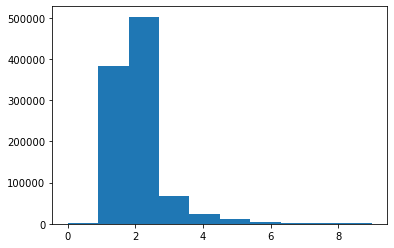

In [43]:
degrees = np.array(degrees)
plt.hist(degrees[degrees < 10])

In [44]:
HG.create_graph_schema()

GraphSchema:
node type: policy
   policy -- default -> broker
   policy -- default -> car
node type: car
   car -- default -> claim
   car -- default -> policy
node type: broker
   broker -- default -> policy
node type: claim
   claim -- default -> car

# First Fraud Test

In [45]:
claim_nodes = []
party_nodes = []

In [46]:
for i in np.arange(1,9):
    claim_nodes.append("2" + str(i))
claim_nodes = pd.DataFrame({"ID": claim_nodes}).set_index("ID")
claim_nodes

""
ID
21
22
23
24
25
26
27
28


In [47]:
for i in np.arange(1,11):
    party_nodes.append("1" + str(i))
party_nodes = pd.DataFrame({"ID": party_nodes}).set_index("ID")
party_nodes

""
ID
11
12
13
14
15
16
17
18
19


In [48]:
edge_nodes = pd.DataFrame(
    {"source": ['12', '13', '13', '12', '13', '13', '11', '14', '11', '14',
                '15', '16', '17', '18', '19', '110', '15', '16', '18', '16', '15'],
     "target": ['23', '23', '24', '21', '21', '25', '21', '25', '22', '22',
              '24', '24', '26', '27', '26', '28', '28', '27', '26', '23', '27']}
)

In [49]:
Network_Antonio = StellarGraph({"claim" : claim_nodes, "party" : party_nodes}, edge_nodes)

In [50]:
G = Network_Antonio.to_networkx()

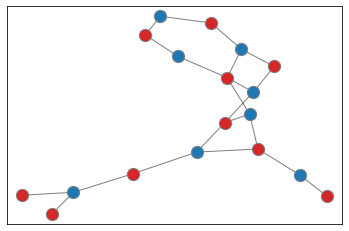

In [51]:
pos = nx.spring_layout(G, seed=314)

options = {"edgecolors": "tab:gray", "node_size": 150}

# nodes
nx.draw_networkx_nodes(G, pos, nodelist=[x for x in party_nodes.index], node_color="tab:red", **options)
nx.draw_networkx_nodes(G, pos, nodelist=[x for x in claim_nodes.index], node_color="tab:blue", **options)

# edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
plt.savefig("Antonio.pdf")

In [52]:
fraud = {"FraudInd" : [False, False, False, True, False, True, True, False]}
fraudMat = pd.DataFrame(fraud); fraudMat

,FraudInd
0,False
1,False
2,False
3,True
4,False
5,True
6,True
7,False


In [53]:
from BiRank import BiRank

In [54]:
HG = list(party_nodes.index)+list(claim_nodes.index)
adj_mat_antonio = Network_Antonio.to_adjacency_matrix(HG)[:len(party_nodes.index), len(party_nodes.index):]

In [55]:
Claims_res, Parties_res, aMat, iterations, convergence = BiRank(adj_mat_antonio, claim_nodes, party_nodes, fraudMat)

Convergence reached.


In [56]:
Claims_res

,ID,Score,StdScore,ScaledScore
5,5,0.275385,1.756054,1.000000
6,6,0.214027,1.016653,0.736495
3,3,0.174062,0.535042,0.564860
7,7,0.103593,-0.314157,0.262225
2,2,0.099588,-0.362428,0.245023
0,0,0.070962,-0.707386,0.122087
4,4,0.057151,-0.873813,0.062777
1,1,0.042534,-1.049966,0.000000


In [57]:
Claims_res

,ID,Score,StdScore,ScaledScore
5,5,0.275385,1.756054,1.000000
6,6,0.214027,1.016653,0.736495
3,3,0.174062,0.535042,0.564860
7,7,0.103593,-0.314157,0.262225
2,2,0.099588,-0.362428,0.245023
0,0,0.070962,-0.707386,0.122087
4,4,0.057151,-0.873813,0.062777
1,1,0.042534,-1.049966,0.000000


In [58]:
Parties_res

,ID,Score,StdScore,ScaledScore
7,7,0.199802,1.395043,1.000000
4,4,0.171655,0.893798,0.812303
5,5,0.162559,0.731816,0.751648
6,6,0.158993,0.668321,0.727871
8,8,0.158993,0.668321,0.727871
2,2,0.119687,-0.031659,0.465756
9,9,0.073251,-0.858593,0.156101
1,1,0.069627,-0.923145,0.131929
0,0,0.050237,-1.268439,0.002630
3,3,0.049843,-1.275462,0.000000


In [59]:
iterations

193

In [60]:
from sklearn.preprocessing import normalize

In [61]:
aMat.toarray()

array([[1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 1., 1., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 1.],
       [0., 0., 1., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [62]:
convergence

True

### Now, to the full dataset

In [63]:
labels.head()

,Fraud,Labelled
SI01_NO_SIN,,
000020211004303,0,0.0
000020211004304,0,0.0
000020211004306,0,0.0
000020211004307,0,0.0
000020211004308,0,0.0


In [64]:
labels.tail()

,Fraud,Labelled
SI01_NO_SIN,,
000020211004295,0,0.0
000020211004296,0,0.0
000020211004300,0,0.0
000020211004301,0,0.0
000020211004302,0,0.0


In [65]:
HG_claims

array(['000020211004303', '000020211004304', '000020211004306', ...,
       '000020211004300', '000020211004301', '000020211004302'],
      dtype=object)

In [68]:
HG_parties = np.concatenate((HG_cars, HG_policies, HG_brokers))

In [70]:
type(adjmat_bipartite)

scipy.sparse.coo.coo_matrix

In [71]:
ADJ = adjmat_bipartite.transpose().tocsr()
Claims_res, Parties_res, aMat, iterations, convergence = BiRank(ADJ, claim_nodes, party_nodes, fraudMat)

C:\Users\bruno\OneDrive\Documenten\KUL\MaAct2\Thesis\Python\BiRank.py:6: RuntimeWarning: divide by zero encountered in true_divide
  Dp = sparse.diags(np.asarray(1 / np.sqrt(adjMat.sum(axis=1).flatten())), [0])
C:\Users\bruno\OneDrive\Documenten\KUL\MaAct2\Thesis\Python\BiRank.py:7: RuntimeWarning: divide by zero encountered in true_divide
  Dc = sparse.diags(np.asarray(1 / np.sqrt(adjMat.sum(axis=0))), [0])


Convergence reached.


In [73]:
Claims_res.head(20)

,ID,Score,StdScore,ScaledScore
2816,2816,0.001185,67.290610,1.000000
348904,348904,0.001185,67.290610,1.000000
47622,47622,0.001185,67.290610,1.000000
361310,361310,0.001185,67.290597,1.000000
46540,46540,0.001185,67.290597,1.000000
215442,215442,0.000777,44.116429,0.656201
211468,211468,0.000777,44.116429,0.656201
65343,65343,0.000658,37.330610,0.555530
60347,60347,0.000657,37.272316,0.554665
113699,113699,0.000656,37.177080,0.553252


In [74]:
iterations

249

In [75]:
HG_claims[2816]

'000020121000912'

In [76]:
labels.iloc[2816]

Fraud       1.0
Labelled    1.0
Name: 000020121000912, dtype: float64

In [78]:
claims_merged = pd.merge(Claims_res, fraudsters, on = "ID")

In [79]:
claims_merged[claims_merged["Fraud"]==0].head(10)

,ID,Score,StdScore,ScaledScore,Fraud,Labelled
382,118521,0.000336,18.982870,0.283333,0,0.0
383,124247,0.000336,18.982870,0.283333,0,0.0
566,40560,0.000287,16.224239,0.242408,0,0.0
567,321876,0.000287,16.224239,0.242408,0,0.0
591,386730,0.000277,15.667893,0.234154,0,0.0
704,302082,0.000245,13.842102,0.207068,0,0.0
783,110468,0.000221,12.434988,0.186192,0,0.0
794,274466,0.000216,12.153342,0.182014,0,0.0
814,45751,0.000207,11.680605,0.175001,0,0.0
817,151755,0.000205,11.526715,0.172718,0,0.0


In [80]:
claims_merged.iloc[380:386]

,ID,Score,StdScore,ScaledScore,Fraud,Labelled
380,35486,0.000337,19.057448,0.284439,1,1.0
381,316445,0.000336,18.995083,0.283514,1,1.0
382,118521,0.000336,18.982870,0.283333,0,0.0
383,124247,0.000336,18.982870,0.283333,0,0.0
384,168433,0.000334,18.873268,0.281707,1,1.0
385,54296,0.000332,18.786609,0.280421,1,1.0


In [81]:
HG_claims[380]

'000020211004854'

In [82]:
HG_claims[381]

'000020211004855'

In [83]:
labels.sum()

Fraud       8.440000e+02
Labelled    1.331100e+04
ID          7.846563e+10
dtype: float64

In [84]:
from sklearn import metrics

In [86]:
y = labels.Fraud.values
pred = Claims_res.sort_values("ID").ScaledScore

In [87]:
fpr, tpr, thresholds = metrics.roc_curve(y,pred)

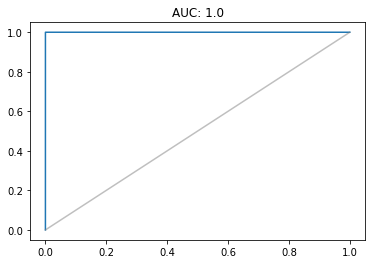

In [88]:
plt.plot(fpr,tpr)
plt.plot([0,1], [0,1], color = "grey", alpha = 0.5)
plt.title("AUC: "+str(np.round(metrics.auc(fpr, tpr),3)))
plt.savefig("AUC_BiRank_1.pdf")

### Train-Test split

Delete part of the network, and adding it later

In [89]:
ADJ = adjmat_bipartite.tocsr()
number_claims = ADJ.shape[0]
train_set_size = int(np.round(0.6*number_claims))
test_set_size = number_claims-train_set_size
ADJ_train= ADJ[:train_set_size,:]
fraud_train = {"FraudInd": labels["Fraud"].values[:train_set_size]}
fraudMat_train = pd.DataFrame(fraud_train)
claims_train = claim_nodes[:train_set_size]

ADJ = ADJ_train.transpose().tocsr()
Claims_res, Parties_res, aMat, iterations, convergence = BiRank(ADJ, claims_train, party_nodes, fraudMat_train)

C:\Users\bruno\OneDrive\Documenten\KUL\MaAct2\Thesis\Python\BiRank.py:6: RuntimeWarning: divide by zero encountered in true_divide
  Dp = sparse.diags(np.asarray(1 / np.sqrt(adjMat.sum(axis=1).flatten())), [0])
C:\Users\bruno\OneDrive\Documenten\KUL\MaAct2\Thesis\Python\BiRank.py:7: RuntimeWarning: divide by zero encountered in true_divide
  Dc = sparse.diags(np.asarray(1 / np.sqrt(adjMat.sum(axis=0))), [0])


Convergence reached.


In [90]:
fraud_train_res = {"FraudInd": Claims_res.sort_values("ID")["ScaledScore"].values}
test_set_fraud = {"FraudInd": [0]*test_set_size}
fraudMat_train_res = pd.DataFrame(fraud_train_res)
fraudMat_test_set = pd.DataFrame(test_set_fraud)
fraudMat_test = fraudMat_train_res.append(fraudMat_test_set)

In [91]:
ADJ = adjmat_bipartite.transpose().tocsr()
Claims_res, Parties_res, aMat, iterations, convergence = BiRank(ADJ, claim_nodes, party_nodes, fraudMat_test)

Convergence reached.


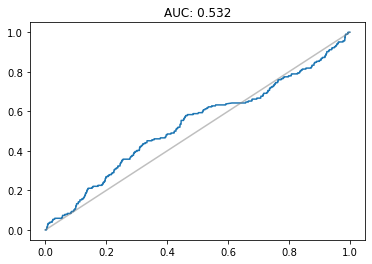

In [92]:
y = labels[train_set_size:].Fraud.values
pred = Claims_res.sort_values("ID")[train_set_size:].ScaledScore
fpr, tpr, thresholds = metrics.roc_curve(y,pred)
plt.plot(fpr,tpr)
plt.plot([0,1], [0,1], color = "grey", alpha = 0.5)
plt.title("AUC: "+str(np.round(metrics.auc(fpr, tpr),3)))
plt.savefig("AUC_BiRank_2.pdf")

Just setting the labels to 0, but keeping the full network

In [93]:
fraud_train = {"FraudInd": labels["Fraud"].values[:train_set_size]}
fraudMat_train = pd.DataFrame(fraud_train)
test_set_fraud = {"FraudInd": [0]*test_set_size}
fraudMat_test_set = pd.DataFrame(test_set_fraud)
fraudMat_test = fraudMat_train.append(fraudMat_test_set)

ADJ = adjmat_bipartite.transpose().tocsr()
Claims_res, Parties_res, aMat, iterations, convergence = BiRank(ADJ, claim_nodes, party_nodes, fraudMat_test)

C:\Users\bruno\OneDrive\Documenten\KUL\MaAct2\Thesis\Python\BiRank.py:6: RuntimeWarning: divide by zero encountered in true_divide
  Dp = sparse.diags(np.asarray(1 / np.sqrt(adjMat.sum(axis=1).flatten())), [0])
C:\Users\bruno\OneDrive\Documenten\KUL\MaAct2\Thesis\Python\BiRank.py:7: RuntimeWarning: divide by zero encountered in true_divide
  Dc = sparse.diags(np.asarray(1 / np.sqrt(adjMat.sum(axis=0))), [0])


Convergence reached.


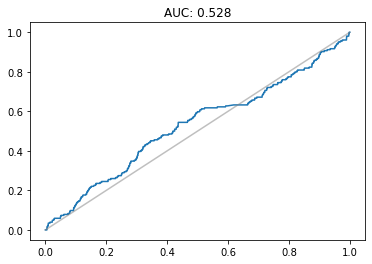

In [94]:
y = labels[train_set_size:].Fraud.values
pred = Claims_res.sort_values("ID")[train_set_size:].ScaledScore
fpr, tpr, thresholds = metrics.roc_curve(y,pred)
plt.plot(fpr,tpr)
plt.plot([0,1], [0,1], color = "grey", alpha = 0.5)
plt.title("AUC: "+str(np.round(metrics.auc(fpr, tpr),3)))
plt.savefig("AUC_BiRank_3.pdf")